## Grouping operations 

#### References
1. Python for data analysis
2. Think stats: exploratory data analysis
3. https://pandas.pydata,org

#### Purpose
1. Work in the abstract (its good for the brain)
2. Keep up to date with changes in the library
3. Explore new ways of doing common tasks --- get better



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle


In [2]:
# get some data
# use the trash data
# incase you forgot the ~ tilda replaces '/home/mw-shovel' or whate ever your home dir is

dfA = pd.read_csv('~/web/notes/basel/data/combined.csv', encoding='latin1')

In [3]:
# make sure the data is good
dfA[:5]

,code_id,date,density,id,length,location_id,quantity,city,latitude,longitude,post,water,pop
0,G21,2017-04-02,0.071,1.0,28.0,Aare_Bern_CaveltiN,2.0,Muri bei Bern,46.923579,7.473319,3074,river,13187.0
1,G27,2017-04-02,0.429,2.0,28.0,Aare_Bern_CaveltiN,12.0,Muri bei Bern,46.923579,7.473319,3074,river,13187.0
2,G30,2017-04-02,0.036,3.0,28.0,Aare_Bern_CaveltiN,1.0,Muri bei Bern,46.923579,7.473319,3074,river,13187.0
3,G33,2017-04-02,0.036,4.0,28.0,Aare_Bern_CaveltiN,1.0,Muri bei Bern,46.923579,7.473319,3074,river,13187.0
4,G66,2017-04-02,0.036,5.0,28.0,Aare_Bern_CaveltiN,1.0,Muri bei Bern,46.923579,7.473319,3074,river,13187.0


In [4]:
# do not delete any columns here
# just grab what is needed as it is needed
# will change a column name

dfA.rename(columns={'density':'pcs_per_m'}, inplace=True)

In [5]:
# get the average density of each code_id
codes = dfA.pcs_per_m.groupby(dfA.code_id)

In [6]:
codes.mean()[:20]

code_id
G10     0.044044
G100    0.054795
G101    0.039837
G124    0.112172
G125    0.076084
G126    0.029282
G128    0.039750
G13     0.043375
G131    0.046959
G133    0.026857
G134    0.054524
G137    0.035386
G138    0.037667
G142    0.063908
G144    0.037548
G145    0.085759
G147    0.033107
G151    0.059221
G152    0.041752
G153    0.040600
Name: pcs_per_m, dtype: float64

In [7]:
# this can be done with an array of values
# try with postal code
codes = dfA.pcs_per_m.groupby([dfA.code_id, dfA.post])
codes.mean()[:2]

code_id  post
G10      1007    0.0370
         1196    0.0835
Name: pcs_per_m, dtype: float64

In [8]:
# or do this rivers vs lakes
codes = dfA.pcs_per_m.groupby([dfA.code_id, dfA.water])
codes.mean()[:5]

code_id  water
G10      lake     0.055737
         river    0.035500
G100     lake     0.068510
         river    0.032938
G101     lake     0.047083
Name: pcs_per_m, dtype: float64

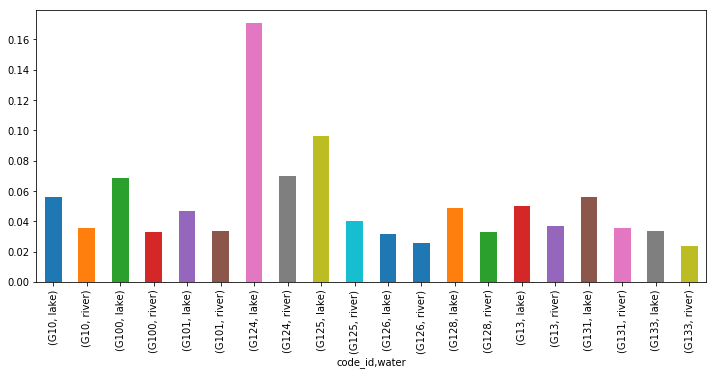

In [9]:
plt.figure(figsize=(12,5));
codes.mean()[:20].plot.bar()
plt.show()

In [10]:
# group by elements can be stored in a dictionary
# the dict key is a tuple given by the group by keys
pieces = dict(list(dfA.pcs_per_m.groupby([dfA.post, dfA.code_id])))
pieces[(1007, 'G27')]

3941    2.926
3972    1.444
4001    1.852
4030    3.667
4051    2.630
4076    1.185
4098    0.889
4116    0.444
4132    0.185
4150    0.481
4176    0.630
Name: pcs_per_m, dtype: float64

In [11]:
# one of these will give a df, the other will give a series

pcs_1 = dfA.pcs_per_m.groupby([dfA.post, dfA.code_id])
pcs_2 = dfA.groupby([dfA.post, dfA.code_id])[['pcs_per_m']]

In [12]:
print(type(pcs_2), type(pcs_1))

<class 'pandas.core.groupby.DataFrameGroupBy'> <class 'pandas.core.groupby.SeriesGroupBy'>


In [13]:
pcs_2.mean()[:10]#< --- this is a dataframe

pcs_per_m
post code_id           
1007 G10        0.03700
     G100       0.10175
     G101       0.05550
     G125       0.14800
     G126       0.03700
     G131       0.04625
     G133       0.03700
     G134       0.03700
     G142       0.07400
     G144       0.03700

In [14]:
pcs_1.mean()[:10]#<----- this is a series

post  code_id
1007  G10        0.03700
      G100       0.10175
      G101       0.05550
      G125       0.14800
      G126       0.03700
      G131       0.04625
      G133       0.03700
      G134       0.03700
      G142       0.07400
      G144       0.03700
Name: pcs_per_m, dtype: float64

In [15]:
t = pcs_2.mean()

In [16]:
t.loc[1007][:8]#<---- this is a df so the indexer can be used

,pcs_per_m
code_id,
G10,0.03700
G100,0.10175
G101,0.05550
G125,0.14800
G126,0.03700
G131,0.04625
G133,0.03700
G134,0.03700


In [17]:
# load some values
codes = pickle.load(open('/home/mw-shovel/web/notes/basel/data/codes.p', 'rb'))
codes[1]

{'code': 'G137',
 'description': 'Clothing, rags, hats etc.,,',
 'material': 'Cloth',
 'source': 'Personal effects'}

In [18]:
# create a dict that can be used to groupby
def code_source(x):
    a = {}
    for i in x:
        b = {i['code']:i['source']}
        a.update(b)
    return a
sources = code_source(codes)

In [19]:
def code_desc(x):
    a = {}
    c = {}
    for i in x:
        b = {i['code']:i['description']}
        d = {i['code']:i['material']}
        a.update(b)
        c.update(d)
    return a, c
desc, materiel = code_desc(codes)
print(materiel['G95'], desc['G95'], sources['G95'])
# will use this later

Plastic Cotton swabs Medical


In [20]:
def tops(df, n, column):
    return df.sort_values(by=column)[-n:]
dfZ = dfA[dfA.city == 'Zürich'].copy()

In [21]:
tops(dfZ, 20, 'pcs_per_m')

,code_id,date,pcs_per_m,id,length,location_id,quantity,city,latitude,longitude,post,water,pop
3489,G27,2017-04-04,2.111,3490.0,63.0,katzensee_regensdorfzuerichaffoltern_stueberj,133.0,Zürich,47.431128,8.492924,8046,lake,410126.0
10391,G79,2017-07-28,2.264,10392.0,53.0,zuerichsee_zurich_kullg,120.0,Zürich,47.353957,8.550474,8008,lake,410126.0
11289,G27,2017-10-16,2.540,11290.0,50.0,zürichsee_wollishofen_langendorfm,127.0,Zürich,47.345890,8.536155,8038,lake,410126.0
11243,G27,2017-08-14,2.580,11244.0,50.0,zürichsee_wollishofen_langendorfm,129.0,Zürich,47.345890,8.536155,8038,lake,410126.0
10473,G27,2017-09-24,2.604,10474.0,53.0,zuerichsee_zurich_kullg,138.0,Zürich,47.353957,8.550474,8008,lake,410126.0
3507,G27,2017-05-03,2.778,3508.0,63.0,katzensee_regensdorfzuerichaffoltern_stueberj,175.0,Zürich,47.431128,8.492924,8046,lake,410126.0
4746,G27,2017-07-12,2.833,4747.0,42.0,limmat_zuerich_suterd&glauserp,119.0,Zürich,47.394539,8.513443,8005,river,410126.0
11590,G27,2017-10-25,2.941,11591.0,101.0,Zürichsee-Feldeggstr-BänningerSand,297.0,Zürich,47.359392,8.547368,8008,lake,410126.0
10371,G208,2017-06-27,3.208,10372.0,53.0,zuerichsee_zurich_kullg,170.0,Zürich,47.353957,8.550474,8008,lake,410126.0
11447,G27,2017-06-20,3.238,11448.0,101.0,Zürichsee-Feldeggstr-BänningerSand,327.0,Zürich,47.359392,8.547368,8008,lake,410126.0


In [22]:
def tops2(df, n=5, column='pcs_per_m'):
    return df.sort_values(by=column)[-n:]


dfZ.groupby('post').apply(tops2)

code_id        date  pcs_per_m       id  length  \
post                                                         
8001 7427     G156  2017-06-25      0.368   7428.0    19.0   
     7471      G27  2018-02-21      0.474   7472.0    19.0   
     7400      G27  2017-04-17      0.579   7401.0    19.0   
     7408      G27  2017-05-21      0.737   7409.0    19.0   
     7420      G27  2017-06-25      1.684   7421.0    19.0   
8005 7361     G208  2018-02-28      0.594   7362.0    32.0   
     7213     G208  2017-04-09      0.781   7214.0    32.0   
     4716      G27  2017-06-14      0.905   4717.0    42.0   
     4673      G27  2017-04-10      0.952   4674.0    42.0   
     4746      G27  2017-07-12      2.833   4747.0    42.0   
8008 10337     G27  2017-06-27      4.868  10338.0    53.0   
     11516     G27  2017-08-23      5.228  11517.0   101.0   
     10428     G27  2017-08-31      5.679  10429.0    53.0   
     10305     G27  2017-05-30      6.792  10306.0    53.0   
     10381     G27  2017-07-28      7.340  10382.0    53.0   
8038 11289     G27  2017-10-16      2.540  11290.0    50.0   
     11243     G27  2017-08-14      2.580  11244.0    50.0   
     11170     G27  2017-05-16      3.600  11171.0    50.0   
     11192     G27  2017-06-18      4.440  11193.0    50.0   
     11143     G27  2017-04-17      5.600  11144.0    50.0   
8041 7106      G27  2017-05-24      0.232   7107.0    99.0   
     7120      G27  2017-06-22      0.263   7121.0    99.0   
     7166     G204  2018-01-26      0.370   7167.0    27.0   
     7371      G27  2017-07-31      0.532   7372.0    47.0   
     7490      G27  2017-07-30      0.633   7491.0    30.0   
8046 3614      G27  2017-11-06      0.825   3615.0    63.0   
     3544      G27  2017-07-05      0.841   3545.0    63.0   
     3597      G27  2017-10-05      0.952   3598.0    63.0   
     3489      G27  2017-04-04      2.111   3490.0    63.0   
     3507      G27  2017-05-03      2.778   3508.0    63.0   
8064 4939     G156  2017-06-23      0.690   4940.0    29.0   
     4933      G67  2017-06-23      0.862   4934.0    29.0   
     4944     G178  2017-06-23      1.103   4945.0    29.0   
     4868      G27  2017-06-30      1.286   4869.0    35.0   
     4929      G27  2017-06-23      6.276   4930.0    29.0   

                                              location_id  quantity    city  \
post                                                                          
8001 7427                            Sihl_Zuerich_ScherfS       7.0  Zürich   
     7471                            Sihl_Zuerich_ScherfS       9.0  Zürich   
     7400                            Sihl_Zuerich_ScherfS      11.0  Zürich   
     7408                            Sihl_Zuerich_ScherfS      14.0  Zürich   
     7420                            Sihl_Zuerich_ScherfS      32.0  Zürich   
8005 7361                  sihl_zuerich_eggerskoehlingera      19.0  Zürich   
     7213                  sihl_zuerich_eggerskoehlingera      25.0  Zürich   
     4716                  limmat_zuerich_suterd&glauserp      38.0  Zürich   
     4673                  limmat_zuerich_suterd&glauserp      40.0  Zürich   
     4746                  limmat_zuerich_suterd&glauserp     119.0  Zürich   
8008 10337                        zuerichsee_zurich_kullg     258.0  Zürich   
     11516             Zürichsee-Feldeggstr-BänningerSand     528.0  Zürich   
     10428                        zuerichsee_zurich_kullg     301.0  Zürich   
     10305                        zuerichsee_zurich_kullg     360.0  Zürich   
     10381                        zuerichsee_zurich_kullg     389.0  Zürich   
8038 11289              zürichsee_wollishofen_langendorfm     127.0  Zürich   
     11243              zürichsee_wollishofen_langendorfm     129.0  Zürich   
     11170              zürichsee_wollishofen_langendorfm     180.0  Zürich   
     11192              zürichsee_wollishofen_langendorfm     222.0  Zürich   
     11143              zürichsee_wollishofen_langendorfm

In [23]:
def tops3(df, n=10, column='pcs_per_m'):
    return df.sort_values(by=column)[-n:]

z = dfZ.groupby(['date', 'post', 'location_id'])[['pcs_per_m']].sum()
z_10 = tops3(z)

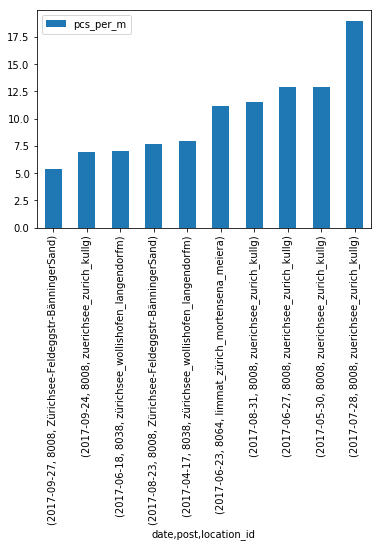

In [24]:
plt.figure(figsize=(12,5));
z_10.plot.bar()
plt.show()

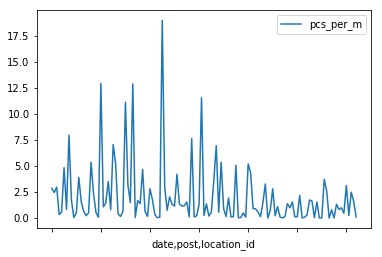

In [25]:
plt.figure(figsize=(12,5));
z.plot()
plt.show()

In [26]:
z.max()

pcs_per_m    18.984
dtype: float64

In [27]:
dfZ.groupby(['post'])[['pcs_per_m']].max()

,pcs_per_m
post,
8001,1.684
8005,2.833
8008,7.340
8038,5.600
8041,0.633
8046,2.778
8064,6.276


In [28]:
quartiles = pd.cut(z.pcs_per_m, 4)

In [29]:
quartiles

date        post  location_id                                  
2017-04-04  8046  katzensee_regensdorfzuerichaffoltern_stueberj    (3.5e-05, 4.76]
2017-04-09  8005  sihl_zuerich_eggerskoehlingera                   (3.5e-05, 4.76]
2017-04-10  8005  limmat_zuerich_suterd&glauserp                   (3.5e-05, 4.76]
2017-04-13  8041  sihl_leimbach_kruegerm                           (3.5e-05, 4.76]
            8064  Limmat_Zuerich_JansenA                           (3.5e-05, 4.76]
2017-04-15  8008  zuerichsee_zurich_kullg                            (4.76, 9.501]
2017-04-17  8001  Sihl_Zuerich_ScherfS                             (3.5e-05, 4.76]
            8038  zürichsee_wollishofen_langendorfm                  (4.76, 9.501]
2017-04-19  8008  Zürichsee-Feldeggstr-BänningerSand               (3.5e-05, 4.76]
2017-04-30  8046  katzenbach_zuerich_sanesim                       (3.5e-05, 4.76]
            8064  Limmat_Zuerich_WagnerC                           (3.5e-05, 4.76]
2017-05-03  8046  katze

In [30]:
def these_stats(grouped):
    return{'min':grouped.min(), 'max':grouped.max(), 'count':grouped.count(), 'mean':grouped.mean()}
cuts = z.pcs_per_m.groupby(quartiles)
cuts.apply(these_stats).unstack()

,count,max,mean,min
pcs_per_m,,,,
"(3.5e-05, 4.76]",110.0,4.693,1.149591,0.019
"(4.76, 9.501]",10.0,7.960,6.077100,4.851
"(9.501, 14.243]",4.0,12.924,12.124500,11.132
"(14.243, 18.984]",1.0,18.984,18.984000,18.984


In [31]:
bucks = len(z)/5
cuts_q = pd.qcut(z.pcs_per_m, 5)
group_q = z.pcs_per_m.groupby(cuts_q)
group_q.apply(these_stats).unstack()

,count,max,mean,min
pcs_per_m,,,,
"(0.018, 0.149]",25.0,0.143,0.07640,0.019
"(0.149, 0.653]",25.0,0.651,0.36908,0.151
"(0.653, 1.426]",25.0,1.402,1.04596,0.654
"(1.426, 3.027]",25.0,3.000,2.05860,1.461
"(3.027, 18.984]",25.0,18.984,6.63828,3.133


In [32]:
z_pivot = dfZ.pivot_table(['pcs_per_m'], index=['date', 'city', 'post', 'water', 'location_id'], columns=['code_id'])

In [33]:
z_pivot[:10]

pcs_per_m  \
code_id                                                                          G10   
date       city   post water location_id                                               
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj       NaN   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                      NaN   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                    0.048   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                              NaN   
                  8064 river Limmat_Zuerich_JansenA                              NaN   
2017-04-15 Zürich 8008 lake  zuerichsee_zurich_kullg                           0.019   
2017-04-17 Zürich 8001 river Sihl_Zuerich_ScherfS                                NaN   
                  8038 lake  zürichsee_wollishofen_langendorfm                 0.380   
2017-04-19 Zürich 8008 lake  Zürichsee-Feldeggstr-BänningerSand                0.030   
2017-04-30 Zürich 8046 river katzenbach_zuerich_sanesim                          NaN   

                                                                                  \
code_id                                                                     G100   
date       city   post water location_id                                           
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj   NaN   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                  NaN   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                  NaN   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                          NaN   
                  8064 river Limmat_Zuerich_JansenA                          NaN   
2017-04-15 Zürich 8008 lake  zuerichsee_zurich_kullg                         NaN   
2017-04-17 Zürich 8001 river Sihl_Zuerich_ScherfS                            NaN   
                  8038 lake  zürichsee_wollishofen_langendorfm              0.02   
2017-04-19 Zürich 8008 lake  Zürichsee-Feldeggstr-BänningerSand              NaN   
2017-04-30 Zürich 8046 river katzenbach_zuerich_sanesim                      NaN   

                                                                                   \
code_id                                                                      G101   
date       city   post water location_id                                            
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj    NaN   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                   NaN   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                 0.024   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                           NaN   
                  8064 river Limmat_Zuerich_JansenA                         0.037   
2017-04-15 Zürich 8008 lake  zuerichsee_zurich_kullg                        0.019   
2017-04-17 Zürich 8001 river Sihl_Zuerich_ScherfS                             NaN   
                  8038 lake  zürichsee_wollishofen_langendorfm              0.020   
2017-04-19 Zürich 8008 lake  Zürichsee-Feldeggstr-BänningerSand               NaN   
2017-04-30 Zürich 8046 river katzenbach_zuerich_sanesim                       NaN   

                                                                                   \
code_id                                                                      G124   
date       city   post water location_id                                            
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj  0.032   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                   NaN   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                 0.071   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                           NaN   
                  8064 river Limmat_Zuerich_JansenA                           NaN   
2017-04-15 Zürich 8008 lake  zuerichsee_zurich_kull

In [34]:
type(z_pivot)

pandas.core.frame.DataFrame

In [35]:
z_pivot_q = dfZ.pivot_table(['quantity'], index=['date', 'city', 'post', 'water', 'location_id'], columns=['code_id'], fill_value=0)

In [36]:
dfZQ = z_pivot_q.groupby(sources, level='code_id', axis=1).sum()

In [37]:
dfZQ[:2]

,,,,code_id,Construction,Fishing,Food,Fragmented,Household,Industry,Medical,Other,Personal effects,Recreation,Tobaco
date,city,post,water,location_id,,,,,,,,,,,
2017-04-04,Zürich,8046,lake,katzensee_regensdorfzuerichaffoltern_stueberj,0,0,25,7,1,2,0,9,2,0,134
2017-04-09,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,7,0,8,2,1,13,0,41,1,0,6


In [38]:
dfZQ['Total'] = dfZQ.sum(axis=1)

In [39]:
Q_column = list(dfZQ.columns)

In [40]:
dfZP = dfZQ.copy()

In [41]:
dfZP.drop(Q_column, axis=1, inplace=True)

In [42]:
def percents():
    for col in Q_column[:-1]:
        dfZP[col] = dfZQ[col]/dfZQ['Total']
percents()

In [43]:
dfZP[:5]

code_id                                                                     Construction  \
date       city   post water location_id                                                   
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj      0.000000   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                     0.088608   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                     0.008000   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                             0.000000   
                  8064 river Limmat_Zuerich_JansenA                             0.000000   

code_id                                                                     Fishing  \
date       city   post water location_id                                              
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj      0.0   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                     0.0   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                     0.0   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                             0.0   
                  8064 river Limmat_Zuerich_JansenA                             0.0   

code_id                                                                         Food  \
date       city   post water location_id                                               
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj  0.138889   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                 0.101266   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                 0.256000   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                         0.114286   
                  8064 river Limmat_Zuerich_JansenA                         0.437500   

code_id                                                                     Fragmented  \
date       city   post water location_id                                                 
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj    0.038889   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                   0.025316   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                   0.136000   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                           0.028571   
                  8064 river Limmat_Zuerich_JansenA                           0.031250   

code_id                                                                     Household  \
date       city   post water location_id                                                
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj   0.005556   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                  0.012658   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                  0.056000   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                          0.028571   
                  8064 river Limmat_Zuerich_JansenA                          0.156250   

code_id                                                                     Industry  \
date       city   post water location_id                                               
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj  0.011111   
2017-04-09 Zürich 8005 river sihl_zuerich_eggerskoehlingera                 0.164557   
2017-04-10 Zürich 8005 river limmat_zuerich_suterd&glauserp                 0.056000   
2017-04-13 Zürich 8041 river sihl_leimbach_kruegerm                         0.000000   
                  8064 river Limmat_Zuerich_JansenA                         0.125000   

code_id                                                                     Medical  \
date       city   post water location_id                                              
2017-04-04 Zürich 8046 lake  katzensee_regensdorfzuerichaffoltern_stueberj    0.00

In [84]:
def get_index_names(df, level):
    a = list(df.index.get_level_values(level).unique())
    return a
beach_names = get_index_names(z_pivot, 4)   

In [46]:
idx = pd.IndexSlice
df1 = dfZQ.loc(axis=0)[:, :, :,:, beach_names[1]]

In [47]:
df2 = df1.diff()

In [48]:
df2

,,,,code_id,Construction,Fishing,Food,Fragmented,Household,Industry,Medical,Other,Personal effects,Recreation,Tobaco,Total
date,city,post,water,location_id,,,,,,,,,,,,
2017-04-09,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-11,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,-7.0,0.0,-2.0,-1.0,1.0,-10.0,0.0,-34.0,-1.0,0.0,-4.0,-58.0
2017-06-26,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,4.0,0.0,10.0,-1.0,2.0,5.0,1.0,1.0,0.0,0.0,5.0,27.0
2017-07-24,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,-4.0,0.0,-3.0,7.0,-3.0,5.0,-1.0,9.0,0.0,0.0,-1.0,9.0
2017-08-29,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,2.0,0.0,-5.0,6.0,1.0,-13.0,0.0,-5.0,0.0,0.0,-1.0,-15.0
2017-09-28,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,0.0,0.0,4.0,-10.0,-2.0,3.0,1.0,-6.0,0.0,1.0,-3.0,-12.0
2017-10-26,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,-2.0,0.0,6.0,-3.0,8.0,-3.0,-1.0,-4.0,1.0,0.0,-2.0,0.0
2017-11-30,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,0.0,0.0,3.0,0.0,8.0,0.0,4.0,-1.0,-1.0,-1.0,3.0,15.0
2018-01-09,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,1.0,1.0,-12.0,20.0,-15.0,8.0,-1.0,7.0,1.0,0.0,1.0,11.0


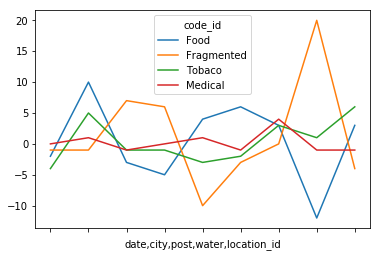

In [49]:
plt.figure(figsize=(12,5));
df2[['Food', 'Fragmented', 'Tobaco', 'Medical']].plot()
plt.show()

In [85]:
beach_names

['katzensee_regensdorfzuerichaffoltern_stueberj',
 'sihl_zuerich_eggerskoehlingera',
 'limmat_zuerich_suterd&glauserp',
 'sihl_leimbach_kruegerm',
 'Limmat_Zuerich_JansenA',
 'zuerichsee_zurich_kullg',
 'Sihl_Zuerich_ScherfS',
 'zürichsee_wollishofen_langendorfm',
 'Zürichsee-Feldeggstr-BänningerSand',
 'katzenbach_zuerich_sanesim',
 'Limmat_Zuerich_WagnerC',
 'limmat_zürich_mortensena_meiera',
 'Sihl_zuerich_eichenbergerD',
 'sihl_zürich_himmelhebern']

In [105]:
dfZ = dfA[dfA.city == 'Zürich'].copy()

In [106]:
z_pivot_q = dfZ.pivot_table(['quantity'], index=['date', 'city', 'post', 'water', 'location_id'], columns=['code_id'], fill_value=0)

In [107]:
dfZQ = z_pivot_q.groupby(sources, level='code_id', axis=1).sum()

5 3


No handles with labels found to put in legend.


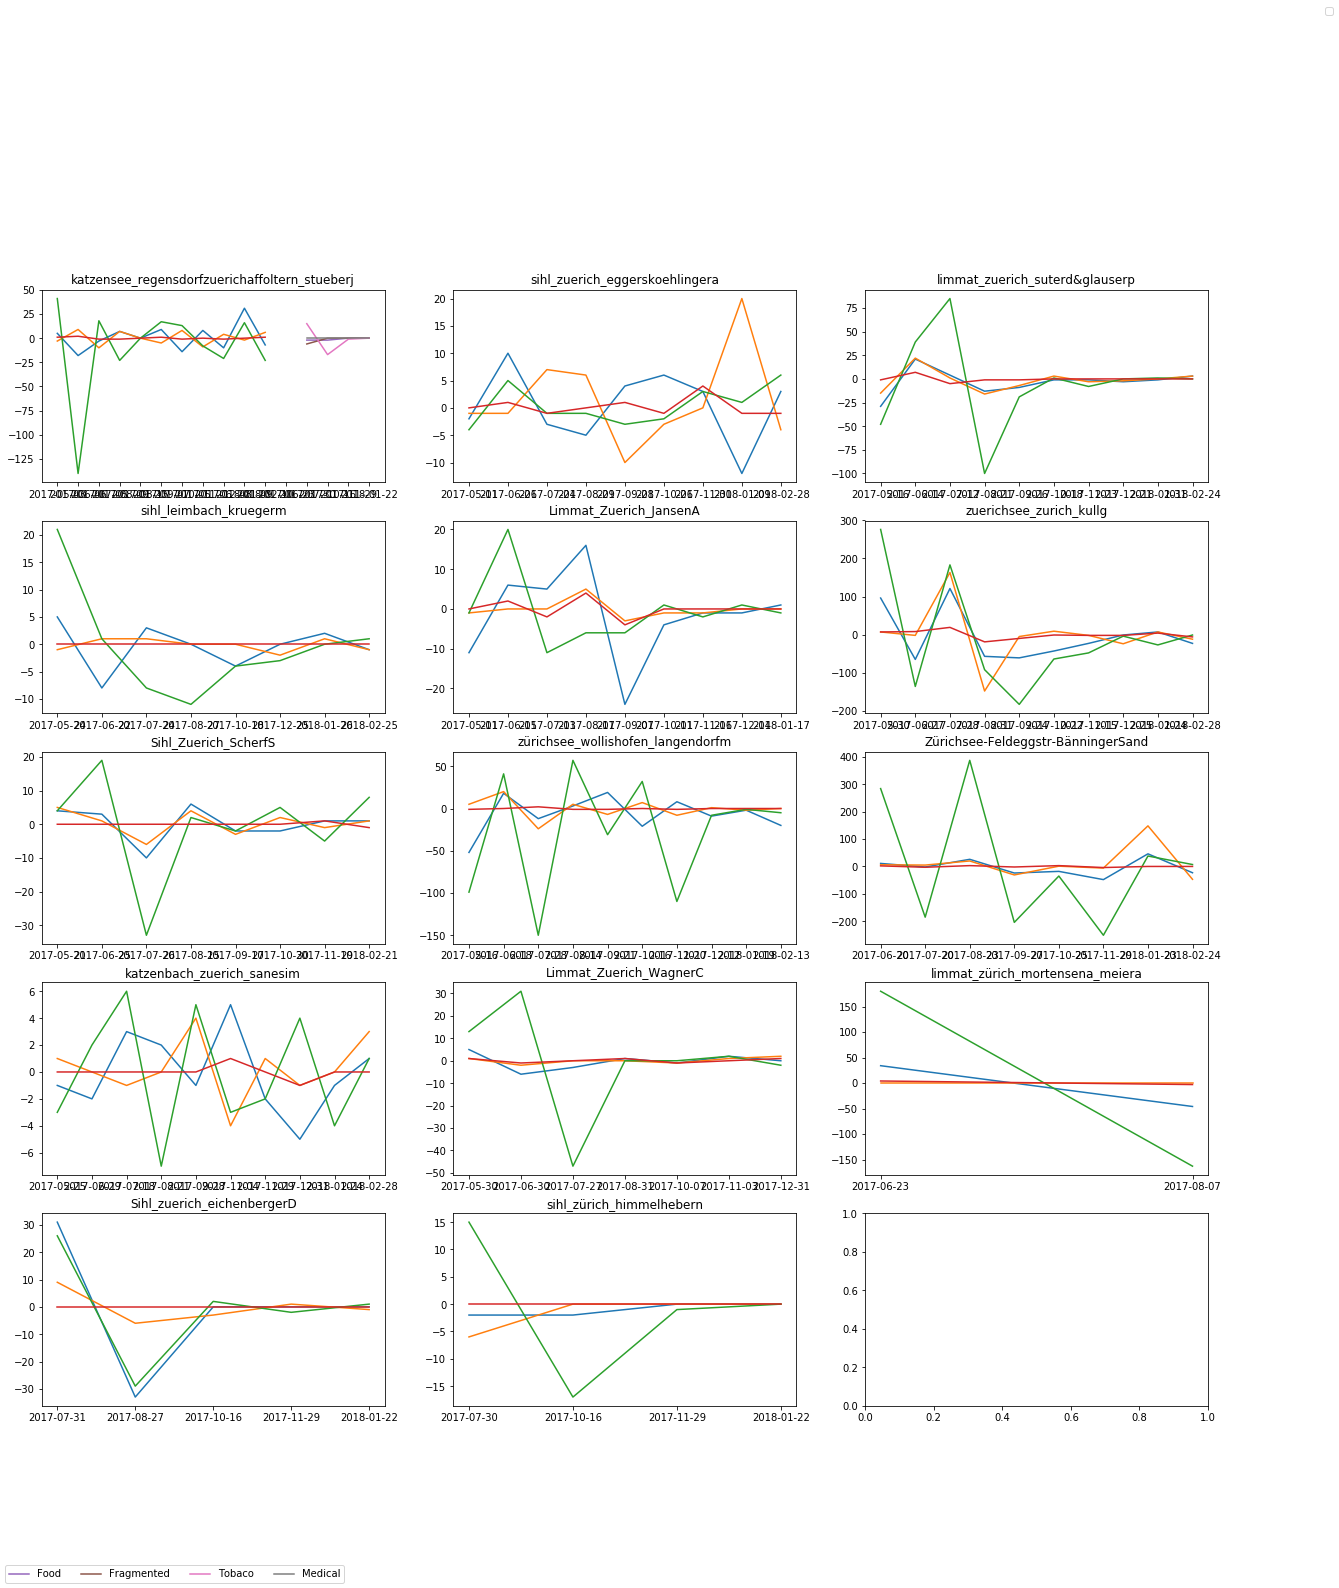

In [140]:
# get the data
def city(df, x):
    a = df[df.city == x].copy()
    return a
# pivot the data
def make_pivot(df):
    a = df.pivot_table(['pcs_per_m'], index=['date', 'post', 'water', 'location_id'], columns=['code_id'])
    return a
# use the dict to group it
def make_a_group(pivot_table, group):
    a = pivot_table.groupby(group, level='code_id', axis=1).sum()
    return a
# plot all the locations of a city or post code

def plot_difs(beaches, df):
    a = len(beaches)
    if a <= 3:
        columns = a
        rows = 1
    elif a%3 > 0:
        columns = 3
        rows = a//3 +1
    elif a%3 == 0:
        columns = 3
        rows = a//3
    #colss = ['lightslategray','turquoise', 'pink','dodgerblue',]
    f, axarr = plt.subplots(rows, columns, figsize=(18,20))
    print(rows, columns)
    for b, c in enumerate(beaches):
        i = b//columns
        dfX = df.loc(axis=0)[:, :, :,:, beaches[b]]#<--- sed dfZQ for example df
        dfDiff = dfX.diff()
        x = list(dfX.index.get_level_values(0))
        category =['Food', 'Fragmented', 'Tobaco', 'Medical']
        axarr[i, b%3].plot(x, dfDiff[category])
        axarr[i, b%3].set_title(c)
    
    
    handles, labels
    f.legend(handles=axarr[0,0].plot(x, dfDiff[category]), labels=category, ncol=4, loc=3)
    plt.legend(bbox_to_anchor=(0, 1,1, .1), bbox_transform =plt.gcf().transFigure)
    plt.subplots_adjust(top=.9, left=0)
    plt.show()
        
plot_difs(beach_names, dfZQ)            
        
        
        

In [66]:
2//3

0

In [50]:
df1

,,,,code_id,Construction,Fishing,Food,Fragmented,Household,Industry,Medical,Other,Personal effects,Recreation,Tobaco,Total
date,city,post,water,location_id,,,,,,,,,,,,
2017-04-09,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,7,0,8,2,1,13,0,41,1,0,6,79
2017-05-11,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,0,0,6,1,2,3,0,7,0,0,2,21
2017-06-26,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,4,0,16,0,4,8,1,8,0,0,7,48
2017-07-24,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,0,0,13,7,1,13,0,17,0,0,6,57
2017-08-29,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,2,0,8,13,2,0,0,12,0,0,5,42
2017-09-28,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,2,0,12,3,0,3,1,6,0,1,2,30
2017-10-26,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,0,0,18,0,8,0,0,2,1,1,0,30
2017-11-30,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,0,0,21,0,16,0,4,1,0,0,3,45
2018-01-09,Zürich,8005,river,sihl_zuerich_eggerskoehlingera,1,1,9,20,1,8,3,8,1,0,4,56


In [80]:
1%3

1

In [ ]:
# get the df:
def city(df, x):
    a = df[df.city == x].copy()
    return a
# group by piece per m (total)
def group_pcs_m(df):
    a = df.groupby(['date', 'location_id'])[['pcs_per_m']].sum()
    return a
# graph the city surveys
def graph_city_surveys(df):
    plt.figure(figsize=(12,5));
    df.plot()
    plt.show()
# get the top ten surveys
def top_ten_surveys(df, n=10, column='pcs_per_m'):
    a = df.sort_values(by=column)[-n:]
    return a
#graph the top ten
def graph_top(df):
    plt.figure(figsize=(12,5));
    df.plot.bar()
    plt.show()
# make a pivot table
def make_pivot(df):
    a = df.pivot_table(['pcs_per_m'], index=['date', 'post', 'water', 'location_id'], columns=['code_id'])
    return a
# get the grouping data
def use_pickle(file):
    a = pickle.load(open(file, 'rb'))
# make grouping dict
def code_desc(x):
    a, c, f = {}, {}, {}
    for i in x:
        b = {i['code']:i['description']}
        d = {i['code']:i['material']}
        e = {i['code']:i['source']}
        a.update(b)
        c.update(d)
        f.update(e)
    return a, c, f
dfZQ = z_pivot_q.groupby(sources, level='code_id', axis=1).sum()
# use code_desc to group pivot table as sources or material
def make_a_group(pivot_table, group):
    a = pivot_table.groupby(group, level='code_id', axis=1).sum()
    return a
# get the index values you need
def get_index_names(df, level):
    a = df.index.get_level_values(level).unique()
    return a